<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Default</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>Default</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("Default.csv")
df.head()
df.shape
df.dtypes

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


(10000, 4)

default     object
student     object
balance    float64
income     float64
dtype: object

<p>Is appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,default,student,balance,income


(0, 4)

<p>There are no obvious missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
df.columns = pd.MultiIndex.from_tuples([('categorical', 'default'), ('categorical', 'student'), 
                          ('quantitative', 'balance'), ('quantitative', 'income')],
                        names=['type of variable', 'variable'])
df.sort_index(axis=1, level='type of variable', inplace=True)
df.head()

type of variable categorical         quantitative              
variable             default student      balance        income
0                         No      No   729.526495  44361.625074
1                         No     Yes   817.180407  12106.134700
2                         No      No  1073.549164  31767.138947
3                         No      No   529.250605  35704.493935
4                         No      No   785.655883  38463.495879

<p>We are now in the position to use our own <code>createDataQualityReports</code> function to create a data quality report for both the categorical and the quantitative variables.</p>

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
df_qr_quantitative.name + ':'
df_qr_quantitative.round(2)
df_qr_categorical.name + ':'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
balance,10000,0.0,9502,0.00,481.73,835.37,823.64,1166.31,2654.32,483.71
income,10000,0.0,10000,771.97,21340.46,33516.98,34552.64,43807.73,73554.23,13336.64


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
default,10000,0.0,2,No,9667,96.67,Yes,333,3.33
student,10000,0.0,2,No,7056,70.56,Yes,2944,29.44


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each quantitative and categorical variable.</p>

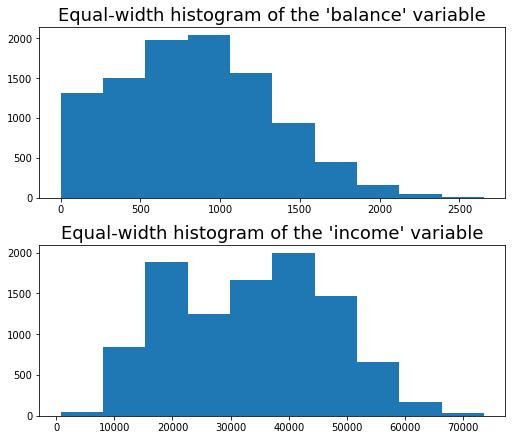

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

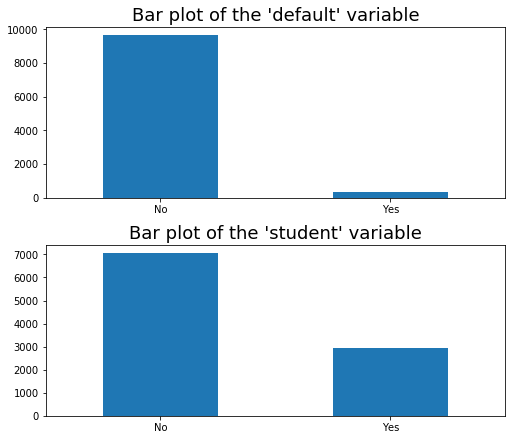

In [7]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)